In [151]:
import pandas as pd
import numpy as np
import glob
import re

In [152]:
FileNamePos =  glob.glob("/Users/krishna/Downloads/aclImdb/train/pos/*.txt")

In [153]:
FileNameNeg =  glob.glob("/Users/krishna/Downloads/aclImdb/train/neg/*.txt")

In [154]:
cntp =1 
pos = {}
for i in FileNamePos:
    lines = list(open(i, 'r'))
    score = i[-6:-4].replace("_", "")
    pos[cntp] = (score,lines,"imdb","en")
    cntp = cntp + 1

In [155]:
cntn =1 
neg = {}
for i in FileNameNeg:
    lines = list(open(i, 'r'))
    score = i[-6:-4].replace("_", "")
    neg[cntn] = (score,lines,"imdb","en")
    cntn = cntn + 1
   

In [156]:
negdf = pd.DataFrame(neg.values(), columns=['score_human', 'text','data_source',"lang"])

In [157]:
posdf = pd.DataFrame(pos.values(), columns=['score_human', 'text','data_source',"lang"])

In [158]:
imdb =posdf.append(negdf,ignore_index = True)

In [159]:
imdb.shape

(25000, 4)

In [160]:
imdb['score_human'] = map(lambda x : round(int(x)/2) ,imdb['score_human']  )
imdb['idd'] = imdb.index

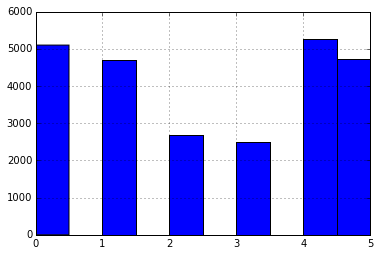

In [161]:
%matplotlib inline
imdb['score_human'].hist()

In [162]:
imdb[0:3]

,score_human,text,data_source,lang,idd
0,4,[Bromwell High is a cartoon comedy. It ran at ...,imdb,en,0
1,4,[Homelessness (or Houselessness as George Carl...,imdb,en,1
2,5,[Brilliant over-acting by Lesley Ann Warren. B...,imdb,en,2


In [163]:
imdb['score_human'].unique()

array([ 4.,  5.,  3.,  1.,  2.,  0.])

In [164]:
import psycopg2

In [165]:
import json
with open('/Users/krishna/MOOC/smart-city/login.json') as data_file:
    db = json.load(data_file)

conn = psycopg2.connect(database=db['dbname'], user=db['user'], password=db['password'], host=db['host'], port=db['port'])

In [166]:
cursor = conn.cursor()

In [150]:
rows_inserted = 0
for i in imdb.as_matrix():
    score_human = i[0]
    text = ''.join(i[1])
    data_source = i[2]
    lang = i[3]
    idd = i[4]
    try:
        cursor.execute('INSERT INTO twitter.tweets_manual (score_human, text, data_source ,lang,idd) VALUES (%s,%s,%s,%s,%s)',
                       (str(score_human), text, data_source ,lang  ,str(idd))
    except KeyError, e:
        print "not inserted"
    

KeyboardInterrupt: 

In [117]:
INSERT INTO twitter.tweets_manual (score_human, text, data_source ,lang  ,idd) VALUES (%s,%s,%s,%s,%s)

SyntaxError: invalid syntax (<ipython-input-117-15e7f02ec2d1>, line 1)

In [ ]:
conn.commit()